In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, BatchNormalization, Add, Multiply, Input, Lambda, Concatenate, GlobalMaxPooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
from tensorflow.keras import mixed_precision
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, DenseNet121, ResNet50, VGG16, InceptionV3

Found 401 images belonging to 3 classes.
Found 99 images belonging to 3 classes.
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727668080.795961      84 service.cc:145] XLA service 0x78f82c005410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727668080.796014      84 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727668080.796020      84 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1727668153.623717      84 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_slice_fusion_3', 20 bytes spill stores, 24 bytes spill loads

I0000 00:00:1727668153.789

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4208 - loss: 1.1846 Epoch 1 finished in 220.37 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 220s 15s/step - accuracy: 0.4424 - loss: 1.1524 - val_accuracy: 0.5960 - val_loss: 1.1292 - learning_rate: 0.0100 - epoch_time: 220.3750
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.7965 - loss: 0.5505Epoch 2 finished in 22.45 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 923ms/step - accuracy: 0.7976 - loss: 0.5465 - val_accuracy: 0.2121 - val_loss: 1.2551 - learning_rate: 0.0100 - epoch_time: 22.4536
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8267 - loss: 0.4193Epoch 3 finished in 24.02 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8262 - loss: 0.4163 - val_accuracy: 0.2121 - val_loss: 1.1898 - learning_rate: 0.0100 - epoch_time: 24.0159
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8762 - loss: 0.2989Epoch 4 finished in 23.03 seconds
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 898ms/step - accuracy: 0.8733 -

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


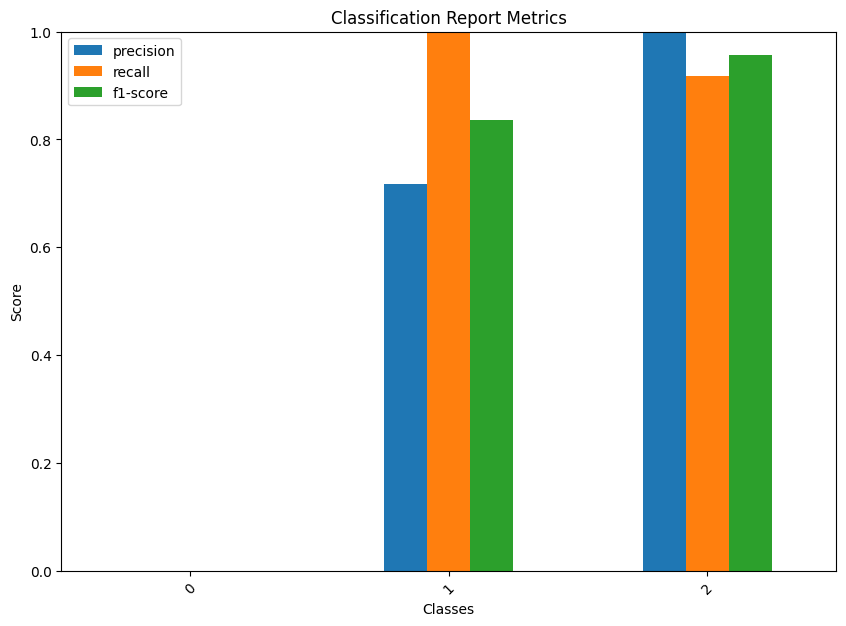

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, BatchNormalization, Add, Multiply, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, DenseNet121, ResNet50, VGG16, InceptionV3

# Parameters
epochs = 50
num_classes = 3

model_name = "vgg16_model"
image_size = (150, 150)
batch_size = 64


# ImageDataGenerator for loading images
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Define the directory for the dataset
dataset_dir = '/kaggle/input/almond-abm/almond/'

# Load the training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Extract a batch of images and labels
x_train, y_train = next(train_generator)
x_test, y_test = next(validation_generator)

# Only apply one-hot encoding to training labels
y_train = to_categorical(y_train, num_classes)

# Build the model
def build_model(base_model_class, input_shape=(150, 150, 3), classes=num_classes, resize=False):
    inputs = Input(shape=input_shape)
    if resize:
        x = Lambda(lambda image: tf.image.resize(image, (75, 75)))(inputs)
    else:
        x = inputs
    base_model = base_model_class(weights=None, input_shape=(75, 75, 3) if resize else input_shape, include_top=False)
    x = base_model(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=output_layer)
    return model

# Custom callback to log metrics and time per epoch
class PerformanceLogger(Callback):
    def on_train_begin(self, logs=None):
        self.epoch_times = []
        self.history = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start = time.time()
    
    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start
        self.epoch_times.append(epoch_time)
        logs['epoch_time'] = epoch_time
        self.history.append(logs)
        print(f'Epoch {epoch+1} finished in {epoch_time:.2f} seconds')

# Compile and train the model
def compile_and_train(model, train_data, val_data, epochs=epochs, batch_size=64):
    optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=80, min_lr=1e-6)
    logger = PerformanceLogger()

    history = model.fit(train_data,
                        epochs=epochs,
                        validation_data=val_data,
                        callbacks=[reduce_lr, logger])
    
    metrics_df = pd.DataFrame(logger.history)
    metrics_df['epoch_time'] = logger.epoch_times
    return history, metrics_df

# Build and train the model
model = build_model(DenseNet121)
history, metrics_df = compile_and_train(model, train_generator, validation_generator)

# Save the model and history
model.save(model_name + '.h5')

import pickle

# Save training history and metrics
with open(model_name + '_history.pickle', 'wb') as file:
    pickle.dump(history, file)
with open(model_name + '_metrics_df.pickle', 'wb') as file:
    pickle.dump(metrics_df, file)

# Load the model
loaded_model = tf.keras.models.load_model(model_name + '.h5')
print("Model loaded successfully!")

# Evaluate the loaded model
loss, accuracy = loaded_model.evaluate(validation_generator)
print(f"Loaded model accuracy: {accuracy:.4f}")

# Get predictions
y_pred = np.argmax(loaded_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)  # Convert y_test back to label format

# Confusion matrix and performance metrics
conf_matrix = confusion_matrix(y_true, y_pred)
TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (FP + FN + TP)

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print confusion matrix and metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Sensitivity per class: {sensitivity}")
print(f"Specificity per class: {specificity}")

# Classification report
report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot classification metrics
df_report.drop(['macro avg', 'weighted avg', 'accuracy'], inplace=True)
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 7), ylim=(0, 1))
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xlabel("Classes")
plt.xticks(rotation=45)
plt.show()


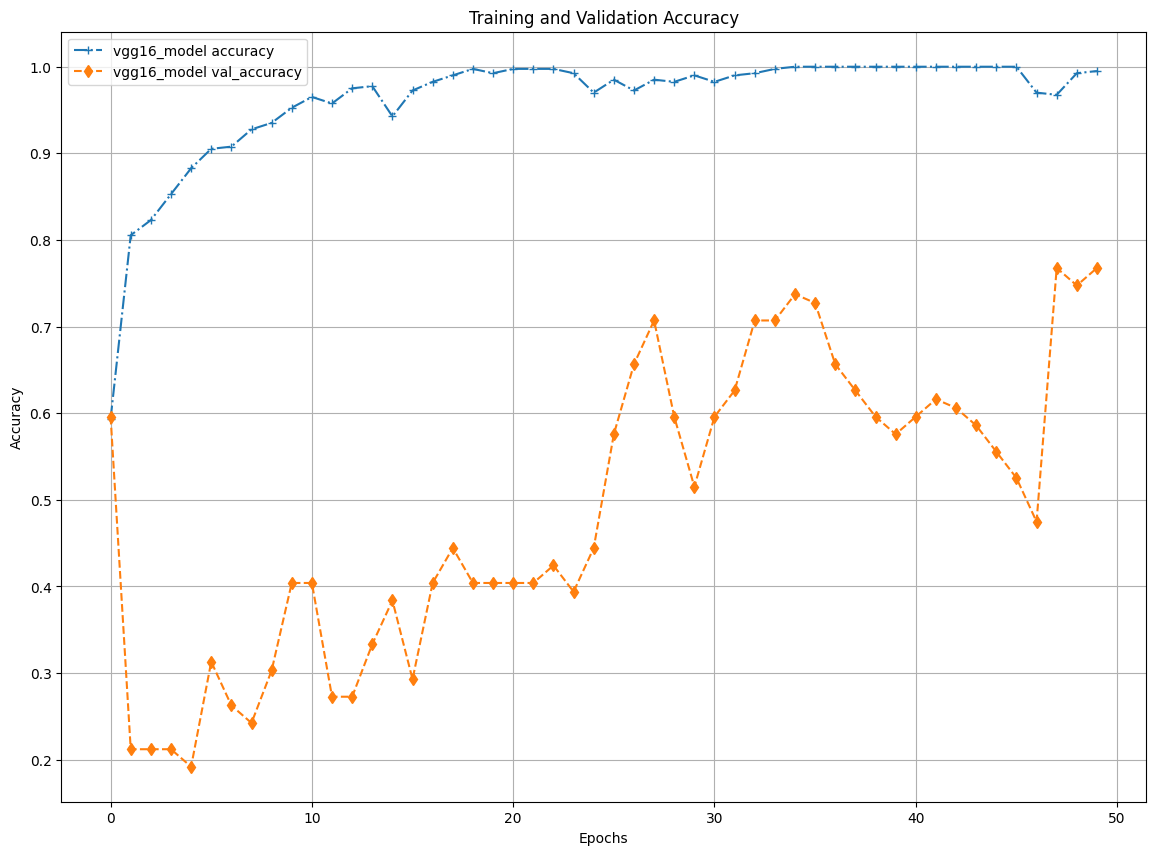

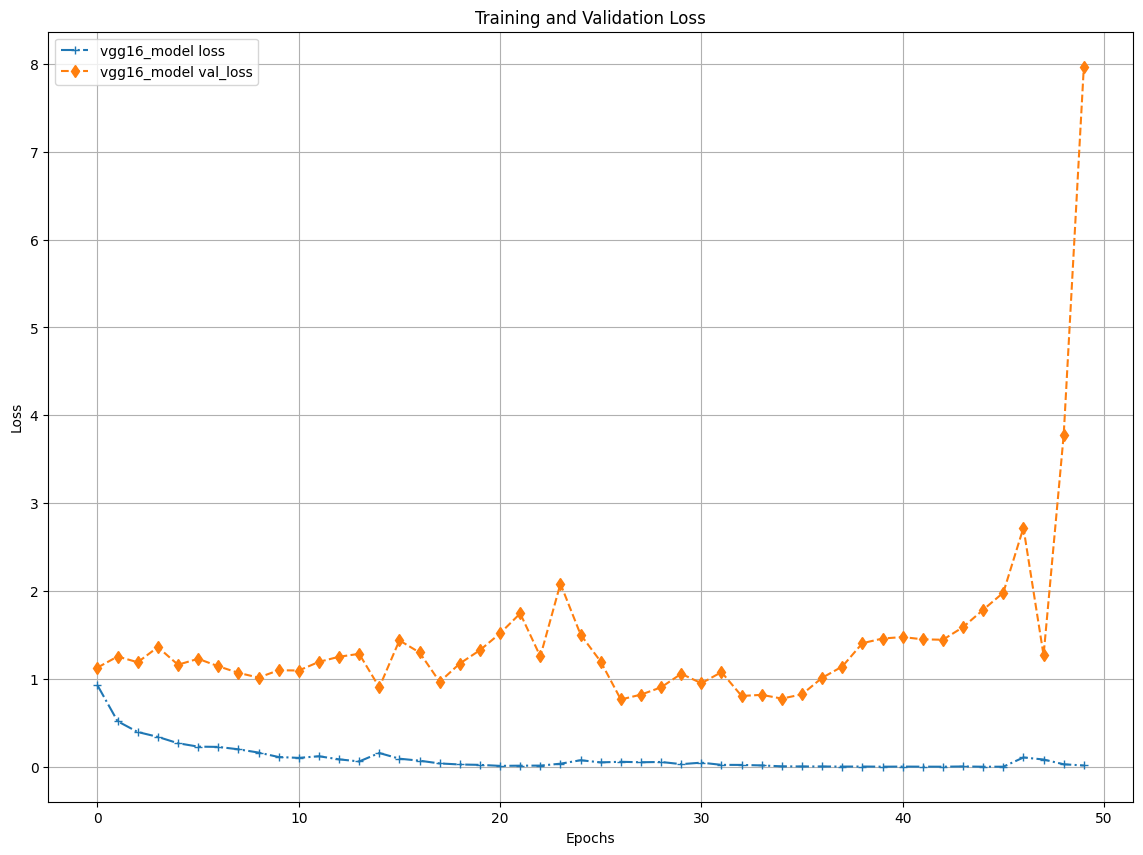

In [3]:

# Plot the results
def plot_history(metric='accuracy',model=model_name):
    plt.figure(figsize=(14, 10))    
    plt.plot(history.history[metric],linestyle='-.', marker='+', label=f"{model} {metric}")
    plt.plot(history.history[f"val_{metric}"], linestyle='--', marker='d', label=f"{model} val_{metric}")
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(metric='accuracy')
plot_history(metric='loss')

f1= 0.6752269469660774
AUC= 0.7232905982905983
Precision= 0.6132075471698113
recall= 0.765625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.72      1.00      0.84        38
           2       1.00      0.92      0.96        12

    accuracy                           0.77        64
   macro avg       0.57      0.64      0.60        64
weighted avg       0.61      0.77      0.68        64



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:13

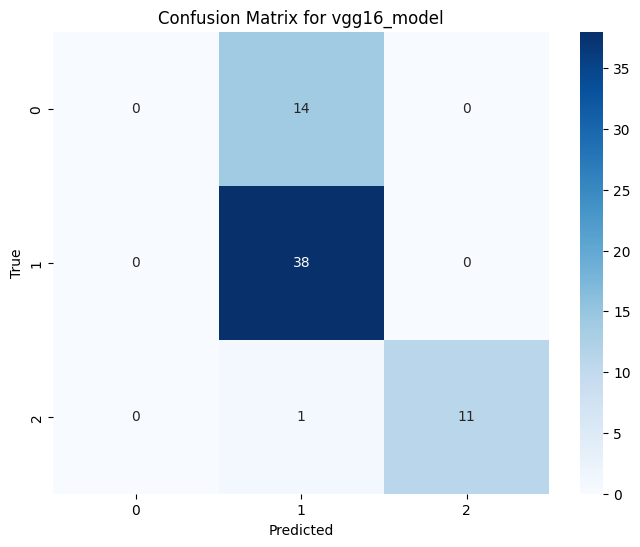

In [4]:
import matplotlib.pyplot as plt

# Calculate and plot additional metrics
def plot_metrics(y_true, y_preds, model=model_name):
        f1_scores = []
        auc_scores = []
        #sensitivities = []
        #specificities = []
        precision_scores=[]
        recall_scores=[]
        
        
        f1 = f1_score(y_true, y_pred, average='weighted')
        print("f1=",f1)
        
        auc = roc_auc_score(y_true, tf.keras.utils.to_categorical(y_pred, num_classes), multi_class='ovr')
        print("AUC=",auc)

        precision=precision_score(y_true, y_pred, average='weighted')
        print("Precision=",precision)

        recall=recall_score(y_true, y_pred, average='weighted')
        print("recall=",recall)


        print(classification_report(y_true, y_pred))

        #print(confusion_matrix(y_true, y_pred).ravel())
        #tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        #sensitivity = tp / (tp + fn)
        #specificity = tn / (tn + fp)

        f1_scores.append(f1)
        auc_scores.append(auc)
        recall_scores.append(recall)
        precision_scores.append(precision)

        #sensitivities.append(sensitivity)
        #specificities.append(specificity)

        # Plot confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()        
        
        return f1, auc, precision, recall

f1, auc, precision, recall = plot_metrics(y_true, y_pred)

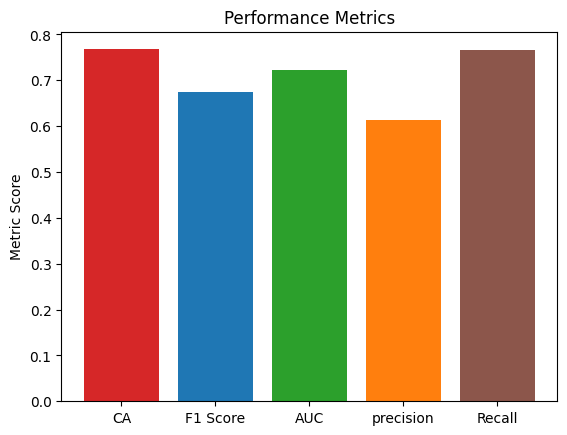

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

metrics_names=["CA", "F1 Score","AUC","precision","Recall"]
metrics_scores=[accuracy, f1, auc, precision, recall]

bar_labels = ['red', 'blue', 'green', 'orange','brown']
bar_colors = ['tab:red', 'tab:blue','tab:green' ,'tab:orange', 'tab:brown']

ax.bar(metrics_names, metrics_scores, label=bar_labels, color=bar_colors)
ax.set_ylabel('Metric Score')
ax.set_title('Performance Metrics')
#ax.legend(title='Bars')
#plt.grid(True)
plt.show()